In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\TECHNOSELLERS\Desktop\Project's_for_Portfolio\Data Anaysis project\EDA_Student_Performance\dataset\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
# Checking for missing values in each column.
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Checking for duplicate records in the dataset.
df.duplicated().sum()

0

In [6]:
# Displaying unique values for each categorical column.
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_columns:
    print(f"{col} :", df[col].unique())


gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']


In [7]:
# Cleaning column names by:
df.columns = df.columns.str.replace(" ", "_").str.lower()

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Setting a clean and modern style for the charts
sns.set_theme(style="darkgrid", palette="viridis", rc={"axes.titlesize": 16, "axes.labelsize": 14})

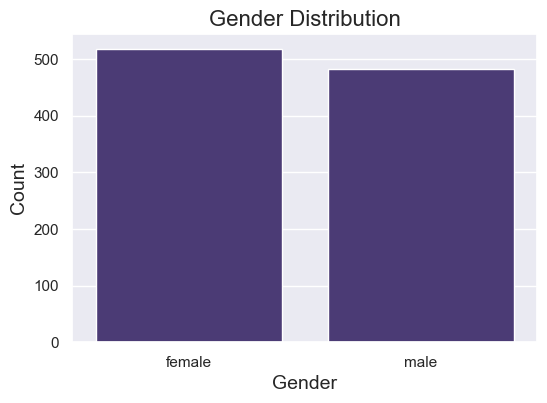

In [9]:
# Plotting the distribution of students by gender.
plt.figure(figsize=(6,4))
sns.countplot(x=df['gender'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

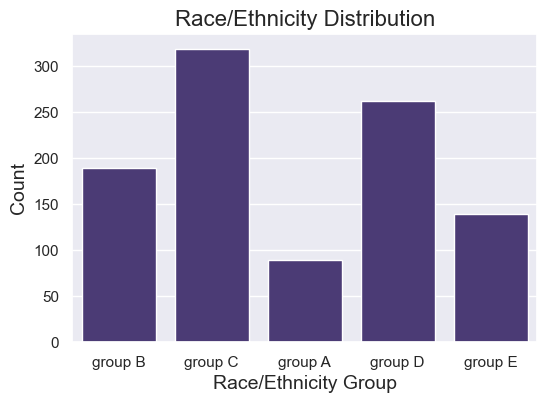

In [10]:
# Visualizing the distribution of students across race/ethnicity groups.
plt.figure(figsize=(6,4))
sns.countplot(x=df['race/ethnicity'])
plt.title("Race/Ethnicity Distribution")
plt.xlabel("Race/Ethnicity Group")
plt.ylabel("Count")
plt.show()

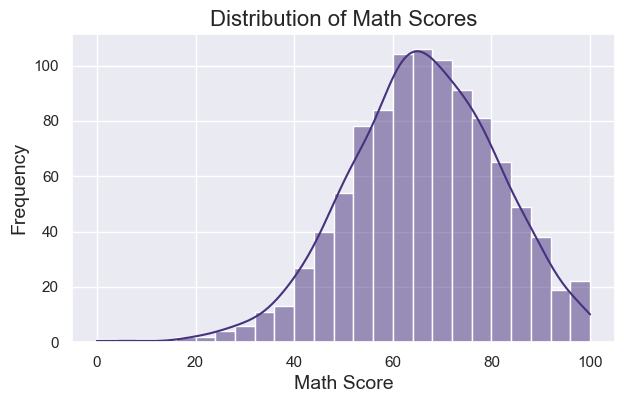

In [11]:
# Plotting the distribution of Math Scores.
plt.figure(figsize=(7,4))
sns.histplot(df['math_score'], kde=True)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

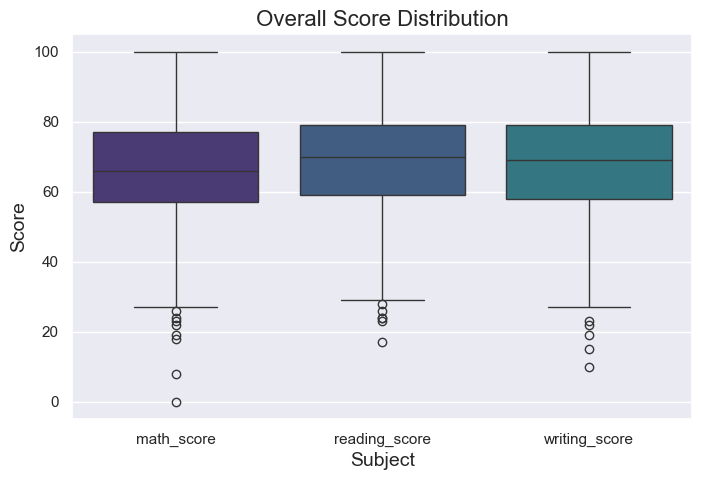

In [12]:
# Comparing Math, Reading, and Writing scores based on gender.
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['math_score', 'reading_score', 'writing_score']])
plt.title("Overall Score Distribution")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.show()

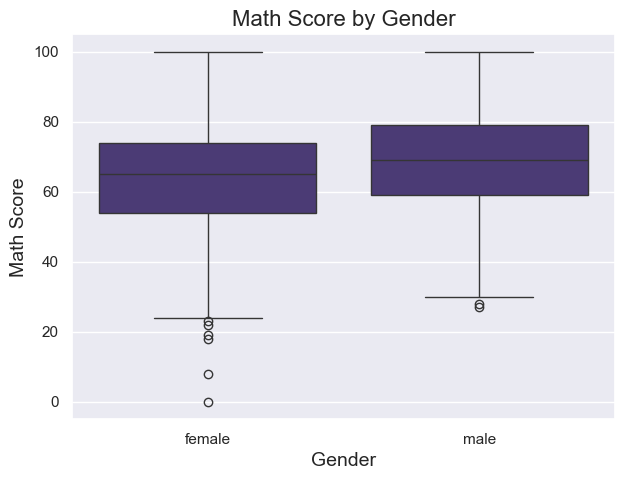

In [13]:
# Boxplot showing how math scores vary between male and female students.
plt.figure(figsize=(7,5))
sns.boxplot(x=df['gender'], y=df['math_score'])
plt.title("Math Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.show()

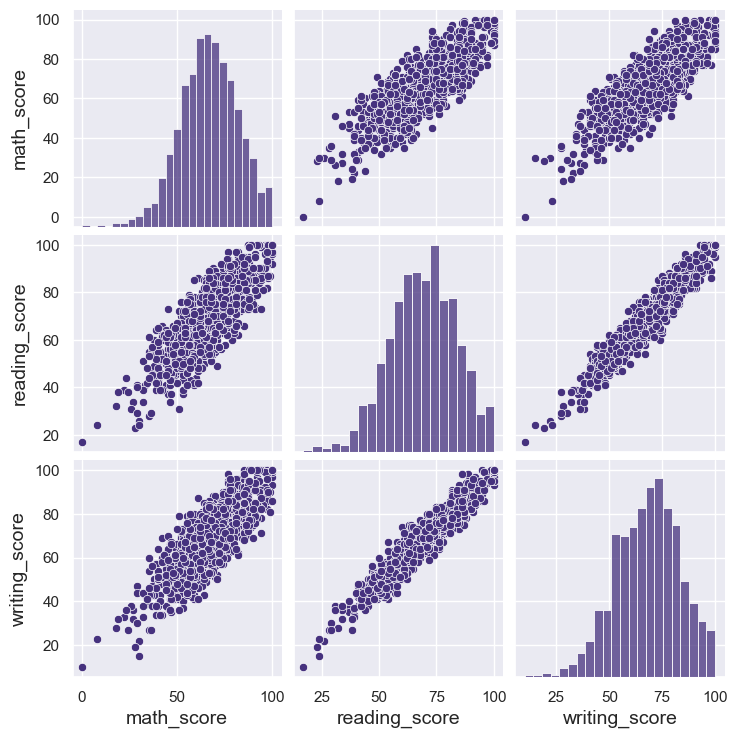

In [14]:
# Pairplot gives a grid of plots comparing all numerical features.
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']])
plt.show()

In [15]:
# Q1: Finding which parental education level is associated with the highest average math score.
parent_math_avg = df.groupby('parental_level_of_education')['math_score'].mean().sort_values(ascending=False)

parent_math_avg

parental_level_of_education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math_score, dtype: float64

In [16]:
# Q2: Comparing average scores between males and females across all subjects.
gender_scores = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

gender_scores

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [17]:
# Q3: Measuring improvement due to completing the test preparation course.
prep_effect = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean()

prep_effect

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [18]:
# Q4: Identifying combinations of gender, lunch type, and test preparation among top 10% performers.
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

threshold = df['total_score'].quantile(0.90)

top_10 = df[df['total_score'] >= threshold]

top_10_group = top_10.groupby(['gender', 'lunch', 'test_preparation_course']).size().sort_values(ascending=False)

top_10_group

gender  lunch         test_preparation_course
female  standard      none                       31
                      completed                  29
male    standard      completed                  20
                      none                        9
female  free/reduced  completed                   6
male    free/reduced  completed                   3
female  free/reduced  none                        2
male    free/reduced  none                        2
dtype: int64

In [19]:
# Q5: Checking how lunch type affects different race/ethnicity groups.

race_lunch_effect = df.groupby(['race/ethnicity', 'lunch'])['total_score'].mean()

race_lunch_effect

race/ethnicity  lunch       
group A         free/reduced    172.972222
                standard        199.849057
group B         free/reduced    182.927536
                standard        204.090909
group C         free/reduced    181.236842
                standard        212.604878
group D         free/reduced    194.000000
                standard        215.239521
group E         free/reduced    202.487805
                standard        224.787879
Name: total_score, dtype: float64

In [20]:
# Q6: Comparing correlation strengths between score pairs.

reading_writing_corr = df['reading_score'].corr(df['writing_score'])
math_writing_corr = df['math_score'].corr(df['writing_score'])

reading_writing_corr, math_writing_corr

(0.954598077146248, 0.8026420459498085)

In [21]:
# Q7: Analyzing top 5% performers and their demographic patterns.
top_5_threshold = df['total_score'].quantile(0.95)

top_5 = df[df['total_score'] >= top_5_threshold]

top_5_demo = top_5.groupby(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']).size()

top_5_demo

gender  race/ethnicity  parental_level_of_education  lunch         test_preparation_course
female  group A         some high school             standard      completed                  1
        group B         associate's degree           standard      completed                  2
                        bachelor's degree            standard      none                       1
                        master's degree              standard      none                       1
                        some college                 standard      completed                  1
        group C         associate's degree           standard      completed                  1
                                                                   none                       1
                        bachelor's degree            standard      completed                  2
                                                                   none                       1
                        some college         

In [22]:
# Q8: Creating clusters (low, medium, high performers) using Pandas only.
low_threshold = df['total_score'].quantile(0.40)
high_threshold = df['total_score'].quantile(0.70)

df['performance_level'] = df['total_score'].apply(
    lambda x: 'Low' if x < low_threshold else 
              ('Medium' if x < high_threshold else 'High')
)

df[['math_score', 'reading_score', 'writing_score', 'total_score', 'performance_level']].head()

,math_score,reading_score,writing_score,total_score,performance_level
0,72,72,74,218,Medium
1,69,90,88,247,High
2,90,95,93,278,High
3,47,57,44,148,Low
4,76,78,75,229,High


In [23]:
# Creating a final cleaned dataset for Power BI.
final_df = df.copy()

final_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,218,Medium
1,female,group C,some college,standard,completed,69,90,88,247,High
2,female,group B,master's degree,standard,none,90,95,93,278,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,Low
4,male,group C,some college,standard,none,76,78,75,229,High


In [26]:
# Exporting the final cleaned dataset for Power BI as a CSV file.
final_df.to_csv(r"C:\Users\TECHNOSELLERS\Desktop\Project's_for_Portfolio\Data Anaysis project\EDA_Student_Performance\dataset\final_student_performance.csv", 
                index=False)

print("File exported successfully!")

File exported successfully!
